In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('breast_cancer.csv') 
 
x = dataset.iloc[:, 1:-1].values 
y = dataset.iloc[:, -1].values 

In [3]:
np.any(np.isnan(x)) 
 


False

In [4]:
np.any(np.isnan(y)) 


False

In [5]:
from sklearn.model_selection import train_test_split 
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,    
             random_state = 0)

In [6]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(x_train, y_train) 
 
LogisticRegression(C = 1.0, class_weight = None, dual = False, fit_intercept = True, 
                   intercept_scaling = 1, l1_ratio = None, max_iter = 100, 
                   multi_class = 'auto', n_jobs = None, penalty = 'l2', 
                   random_state = 0, solver = 'lbfgs', tol = 0.0001, verbose = 0, 
                   warm_start = False)

LogisticRegression(random_state=0)

In [7]:
y_pred = classifier.predict(x_test) 
y_pred[0:10]

array([4, 2, 4, 4, 2, 2, 4, 2, 2, 2])

In [8]:
comparison = np.concatenate((y_test.reshape(-1,1), y_pred.reshape(-1,1)), axis = 1)  
 
comparison[0:10,:]

array([[4, 4],
       [2, 2],
       [4, 4],
       [4, 4],
       [2, 2],
       [2, 2],
       [4, 4],
       [2, 2],
       [2, 2],
       [2, 2]])

In [9]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred) 
 
print(cm)

[[83  2]
 [ 2 53]]


Text(0, 0.5, 'True tumor class')

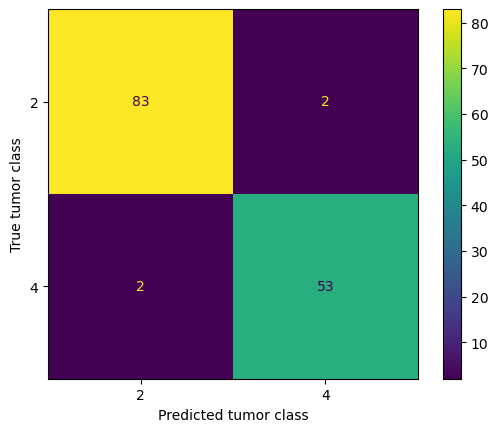

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# assuming classifier, x_test and y_test are already defined
y_pred = classifier.predict(x_test)
cm_display = ConfusionMatrixDisplay.from_predictions(y_pred, y_test)
plt.xlabel("Predicted tumor class")
plt.ylabel("True tumor class")


In [34]:
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv=10) 
print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) 
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.95 %
Standard Deviation: 1.81 %
